<img src="images/cs5228-header-title.png" />

### Group_work - Exploratory Data Analysis (EDA) & Data Preprocessing

This notebook covers Exploratory Data Analysis (EDA) and Data Preprocessing for the Singapore Used Car Price Prediction project.

### Step 1: Data Exploration and Preprocessing

#### 1.1 Data Loading and Initial Exploration

loading the dataset and examining its structure:

In [38]:
# !pip install pandas numpy matplotlib seaborn scikit-learn fuzzywuzzy python-Levenshtein

In [39]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from fuzzywuzzy import process
import re
import os

# 设置图表风格
# plt.style.use('seaborn')

# load data
# data = pd.read_csv('../../data/for-experiment-raw/for_train.csv',index_col=0)
data = pd.read_csv('../../data/raw/train.csv',index_col=0)

print(data.shape)
data.head()

(25000, 29)


,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,transmission,...,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price
listing_id,,,,,,,,,,,,,,,,,,,,,
1292132,Land Rover Range Rover Velar 3.0A Si6 R-Dynami...,land rover,range,"1 owner, no repairs needed! it looks great, in...",2018.0,NaN,08-mar-2018,suv,parf car,auto,...,96000.0,88906.0,132031.0,NaN,NaN,uncategorized,3l supercharged v6 p380 engine at 375bhp/450nm...,"2 x massage/memory/cooling & warmer seat, rear...",NaN,193788.0
1294696,Mercedes-Benz C-Class C200 Sport Premium Sunroof,mercedes-benz,c200,rare beautiful white c200 sport premium sunroo...,2017.0,NaN,28-dec-2017,luxury sedan,"parf car, premium ad car",auto,...,85680.0,40678.0,43950.0,NaN,NaN,uncategorized,"2.0l 4 cylinders inline turbocharged engine, p...","multi function steering, electric tailgate, re...",NaN,96800.0
1311717,Honda Odyssey 2.4A (COE till 09/2027),honda,odyssey,comes with warranty. full service done.,2007.0,NaN,19-sep-2007,mpv,"coe car, premium ad car, low mileage car",auto,...,138000.0,27994.0,30794.0,NaN,NaN,uncategorized,"2.4l k24a 4 cylinders inline dohc i-vtec, 5 sp...","cruise control, touchscreen audio, reverse cam...",NaN,39800.0
1310068,Toyota Corolla Altis 1.6A (COE till 12/2028),toyota,altis,0,2008.0,NaN,15-dec-2008,mid-sized sedan,"coe car, premium ad car",auto,...,160000.0,16084.0,16084.0,NaN,NaN,uncategorized,super fuel efficient 1.6l 16 valves dohc vvt-i...,"leather seats, pioneer dvd audio system with r...",NaN,44800.0
1325280,Lexus GS300 (COE till 06/2026),lexus,gs,wear and tear done up. well maintained and reg...,2006.0,NaN,22-dec-2006,luxury sedan,"coe car, premium ad car",auto,...,183000.0,50414.0,55456.0,NaN,NaN,uncategorized,"powerful 3.0l v6 engine, 227bhp, 6 speed , key...",premium upholstery electric seats. memory seat...,NaN,25800.0


#### 1.2 Understanding Each Attribute

##### 1.2.1 check the pysical meaning of each column
1. **listing_id**: Unique identifier for each car listing in the dataset.

2. **title**: A brief description of the car.

3. **make**: The brand of the car (e.g., Toyota, Honda).

4. **model**: The specific model of the car within a brand.

5. **description**: Detailed description of the car.

6. **manufactured**: The year the car was manufactured.

7. **original_reg_date**: Date of first registration of the car.

8. **reg_date**: Most recent registration date of the car.

9. **type_of_vehicle**: Category of the vehicle (e.g., sedan, SUV).

10. **category**: A more specific categorization of the vehicle.

11. **transmission**: Type of transmission of the car (e.g., automatic, manual).

12. **curb_weight**: Weight of the vehicle without passengers or cargo.

13. **power**: Engine power of the car, likely in horsepower or kilowatts.

14. **fuel_type**: Type of fuel the car uses (e.g., petrol, diesel, electric).

15. **engine_cap**: Engine capacity of the car, typically in liters or cc.

16. **no_of_owners**: Number of previous owners of the car.

17. **depreciation**: Rate at which the car loses value over time.

18. **coe**: Certificate of Entitlement, specific to Singapore's car market.

19. **road_tax**: Amount of road tax payable for the vehicle.

20. **dereg_value**: Value of the car if it were to be deregistered.

21. **mileage**: Distance the car has been driven.

22. **omv**: Open Market Value, the car's value before taxes.

23. **arf**: Additional Registration Fee, a tax imposed on vehicle registration.

24. **opc_scheme**: Off-Peak Car scheme, specific to Singapore's traffic management.

25. **lifespan**: Expected or remaining lifespan of the vehicle.

26. **eco_category**: Environmental category of the car.

27. **features**: List of car features or amenities.

28. **accessories**: Additional accessories or modifications to the car.

29. **indicative_price**: A suggested or estimated price for the car.

30. **price**: The actual price of the car.

##### 1.2.2 Deeper Understanding and Thought after Our First meeting(2024.9.25)

| Attribute | Data Type | Null Values | Characteristics | Processing Suggestions |
|-----------|-----------|-------------|-----------------|------------------------|
| listing_id | int64 | 0 | Unique identifier | Remove, not useful for analysis |
| title | object | 0 | Contains brand, model, engine info | Use to fill make and model gaps; possibly extract engine info |
| make | object | 1316 | 95 car brands | Fill nulls using title; consider grouping rare brands as "Other" |
| model | object | 0 | 799 car models | Use title to correct inaccuracies |
| description | object | 680 | Free text | Consider NLP for key info extraction; potential for new feature creation |
| manufactured | float64 | 7 | Manufacturing year | remove null row|
| original_reg_date | object | 24745 | Original registration date | Consider removing |
| reg_date | object | 0 | Registration date | Convert to vehicle age |
| type_of_vehicle | object | 0 | 11 vehicle types | One-hot encoding or ordinal encoding |
| category | object | 0 | 15 categories, multi-valued | One-hot encoding, treat "-" as a category |
| transmission | object | 0 | Auto/Manual | Binary encoding (0/1) |
| curb_weight | float64 | 307 | Vehicle weight (kg) | Mean imputation or consider removal |
| power | float64 | 2640 | Engine power (kW) | Mean imputation |
| fuel_type | object | 19121 | 5 fuel types | One-hot encoding, consider imputation using make+model |
| engine_cap | float64 | 596 | Engine capacity (cc) | Mean imputation, possibly group by engine type |
| no_of_owners | float64 | 18 | 1-6 previous owners | Mode imputation, maintain numerical relationship |
| depreciation | float64 | 507 | Annual depreciation (SGD) | Mean imputation or remove related rows |
| coe | int64 | 0 | Certificate of Entitlement value (SGD) | No processing needed, consider association with title |
| road_tax | float64 | 2632 | Annual road tax (SGD) | Mean imputation, possibly associate with engine size |
| dereg_value | float64 | 220 | Deregistration value (SGD) | Consider removal (high correlation with price) |
| mileage | float64 | 5304 | Kilometers driven | Consider removal or median imputation |
| omv | float64 | 64 | Open Market Value (SGD) | Mean imputation or remove related rows |
| arf | float64 | 174 | Additional Registration Fee (SGD) | Mean imputation or remove related rows |
| opc_scheme | object | 24838 | Off-Peak Car scheme | Consider removal or further investigation of impact |
| lifespan | object | 22671 | Vehicle scrappage date | Convert to remaining lifespan, consider predictive imputation |
| eco_category | object | 0 | Only "uncategorized" | Remove |
| features | object | 843 | Vehicle feature descriptions | Consider NLP for key info extraction |
| accessories | object | 3813 | Accessory descriptions | Consider NLP for key info extraction |
| indicative_price | float64 | 25000 | Guide price | Remove |
| price | float64 | 0 | Actual selling price (SGD) | Target variable, no processing needed |

Our thought process and considerations:
1. Unique Identifier: We decided to remove 'listing_id' as it's not useful for price prediction.
2. Title Information: We noted that 'title' contains valuable information about make and model, which can be used to fill gaps in those fields.
3. Make and Model Consistency: We observed discrepancies between 'title', 'make', and 'model'. We plan to use 'title' to correct and fill in 'make' (1316 nulls) and 'model' information.
4. Date Handling: We decided to convert 'reg_date' into vehicle age. We're considering removing 'original_reg_date' due to excessive missing values (24,745 nulls).
5. Categorical Variables: 
   - For 'type_of_vehicle' (11 types) and 'category' (15 types), we proposed one-hot encoding.
   - 'transmission' will be binary encoded (0/1) as it only has two categories.
6. Numerical Attributes:
   - We'll use mean imputation for 'curb_weight', 'power', 'engine_cap', 'depreciation', 'road_tax', 'omv', and 'arf'.
   - 'mileage' has many nulls (5,304); we're considering removal or median imputation.
7. Fuel Type: Despite high nulls (19,121), we'll keep 'fuel_type' and one-hot encode it, possibly using make+model for imputation.
8. Previous Owners: We'll use mode imputation for 'no_of_owners' and maintain its numerical relationship.
9. Text Fields: For 'description', 'features', and 'accessories', we're considering NLP techniques to extract key information.
10. Singapore-specific Features: 
    - We recognized the importance of 'coe' in the Singapore market.
    - We're considering removing 'opc_scheme' due to excessive nulls (24,838) but may investigate its impact further.
11. Correlated Features: We noted 'dereg_value' is highly correlated with price (0.92) and are considering its removal.
12. Useless Features: We decided to remove 'eco_category' (only one category) and 'indicative_price' (all null).
13. Target Variable: We identified 'price' as our prediction target, requiring no preprocessing.
14. Time-related Feature: For 'lifespan', we plan to convert it to remaining lifespan and consider predictive imputation for the many null values (22,671).

<svg id="mermaidChart163" width="100%" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" style="max-width: 830.312px; margin: 0px; color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px;" viewBox="0 0 830.3125 520.71875" role="graphics-document document" aria-roledescription="classDiagram"><style style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">#mermaidChart163{font-family:sans-serif;font-size:16px;fill:rgb(58, 71, 73);}#mermaidChart163 .error-icon{fill:#552222;}#mermaidChart163 .error-text{fill:#552222;stroke:#552222;}#mermaidChart163 .edge-thickness-normal{stroke-width:2px;}#mermaidChart163 .edge-thickness-thick{stroke-width:3.5px;}#mermaidChart163 .edge-pattern-solid{stroke-dasharray:0;}#mermaidChart163 .edge-pattern-dashed{stroke-dasharray:3;}#mermaidChart163 .edge-pattern-dotted{stroke-dasharray:2;}#mermaidChart163 .marker{fill:#333333;stroke:#333333;}#mermaidChart163 .marker.cross{stroke:#333333;}#mermaidChart163 svg{font-family:sans-serif;font-size:16px;}#mermaidChart163 g.classGroup text{fill:#9370DB;stroke:none;font-family:sans-serif;font-size:10px;}#mermaidChart163 g.classGroup text .title{font-weight:bolder;}#mermaidChart163 .nodeLabel,#mermaidChart163 .edgeLabel{color:#131300;}#mermaidChart163 .edgeLabel .label rect{fill:#ECECFF;}#mermaidChart163 .label text{fill:#131300;}#mermaidChart163 .edgeLabel .label span{background:#ECECFF;}#mermaidChart163 .classTitle{font-weight:bolder;}#mermaidChart163 .node rect,#mermaidChart163 .node circle,#mermaidChart163 .node ellipse,#mermaidChart163 .node polygon,#mermaidChart163 .node path{fill:#ECECFF;stroke:#9370DB;stroke-width:1px;}#mermaidChart163 .divider{stroke:#9370DB;stroke-width:1;}#mermaidChart163 g.clickable{cursor:pointer;}#mermaidChart163 g.classGroup rect{fill:#ECECFF;stroke:#9370DB;}#mermaidChart163 g.classGroup line{stroke:#9370DB;stroke-width:1;}#mermaidChart163 .classLabel .box{stroke:none;stroke-width:0;fill:#ECECFF;opacity:0.5;}#mermaidChart163 .classLabel .label{fill:#9370DB;font-size:10px;}#mermaidChart163 .relation{stroke:#333333;stroke-width:1;fill:none;}#mermaidChart163 .dashed-line{stroke-dasharray:3;}#mermaidChart163 .dotted-line{stroke-dasharray:1 2;}#mermaidChart163 #compositionStart,#mermaidChart163 .composition{fill:#333333!important;stroke:#333333!important;stroke-width:1;}#mermaidChart163 #compositionEnd,#mermaidChart163 .composition{fill:#333333!important;stroke:#333333!important;stroke-width:1;}#mermaidChart163 #dependencyStart,#mermaidChart163 .dependency{fill:#333333!important;stroke:#333333!important;stroke-width:1;}#mermaidChart163 #dependencyStart,#mermaidChart163 .dependency{fill:#333333!important;stroke:#333333!important;stroke-width:1;}#mermaidChart163 #extensionStart,#mermaidChart163 .extension{fill:transparent!important;stroke:#333333!important;stroke-width:1;}#mermaidChart163 #extensionEnd,#mermaidChart163 .extension{fill:transparent!important;stroke:#333333!important;stroke-width:1;}#mermaidChart163 #aggregationStart,#mermaidChart163 .aggregation{fill:transparent!important;stroke:#333333!important;stroke-width:1;}#mermaidChart163 #aggregationEnd,#mermaidChart163 .aggregation{fill:transparent!important;stroke:#333333!important;stroke-width:1;}#mermaidChart163 #lollipopStart,#mermaidChart163 .lollipop{fill:#ECECFF!important;stroke:#333333!important;stroke-width:1;}#mermaidChart163 #lollipopEnd,#mermaidChart163 .lollipop{fill:#ECECFF!important;stroke:#333333!important;stroke-width:1;}#mermaidChart163 .edgeTerminals{font-size:11px;line-height:initial;}#mermaidChart163 .classTitleText{text-anchor:middle;font-size:18px;fill:#333;}#mermaidChart163 :root{--mermaid-alt-font-family:sans-serif;}</style><g style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><defs style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><marker id="mermaidChart163_classDiagram-aggregationStart" class="marker aggregation classDiagram" refX="18" refY="7" markerWidth="190" markerHeight="240" orient="auto" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgba(0, 0, 0, 0); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><path d="M 18,7 L9,13 L1,7 L9,1 Z" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgba(0, 0, 0, 0); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></path></marker></defs><defs style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><marker id="mermaidChart163_classDiagram-aggregationEnd" class="marker aggregation classDiagram" refX="1" refY="7" markerWidth="20" markerHeight="28" orient="auto" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgba(0, 0, 0, 0); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><path d="M 18,7 L9,13 L1,7 L9,1 Z" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgba(0, 0, 0, 0); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></path></marker></defs><defs style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><marker id="mermaidChart163_classDiagram-extensionStart" class="marker extension classDiagram" refX="18" refY="7" markerWidth="190" markerHeight="240" orient="auto" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgba(0, 0, 0, 0); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><path d="M 1,7 L18,13 V 1 Z" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgba(0, 0, 0, 0); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></path></marker></defs><defs style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><marker id="mermaidChart163_classDiagram-extensionEnd" class="marker extension classDiagram" refX="1" refY="7" markerWidth="20" markerHeight="28" orient="auto" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgba(0, 0, 0, 0); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><path d="M 1,1 V 13 L18,7 Z" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgba(0, 0, 0, 0); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></path></marker></defs><defs style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><marker id="mermaidChart163_classDiagram-compositionStart" class="marker composition classDiagram" refX="18" refY="7" markerWidth="190" markerHeight="240" orient="auto" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(51, 51, 51); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><path d="M 18,7 L9,13 L1,7 L9,1 Z" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(51, 51, 51); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></path></marker></defs><defs style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><marker id="mermaidChart163_classDiagram-compositionEnd" class="marker composition classDiagram" refX="1" refY="7" markerWidth="20" markerHeight="28" orient="auto" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(51, 51, 51); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><path d="M 18,7 L9,13 L1,7 L9,1 Z" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(51, 51, 51); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></path></marker></defs><defs style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><marker id="mermaidChart163_classDiagram-dependencyStart" class="marker dependency classDiagram" refX="6" refY="7" markerWidth="190" markerHeight="240" orient="auto" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(51, 51, 51); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><path d="M 5,7 L9,13 L1,7 L9,1 Z" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(51, 51, 51); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></path></marker></defs><defs style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><marker id="mermaidChart163_classDiagram-dependencyEnd" class="marker dependency classDiagram" refX="13" refY="7" markerWidth="20" markerHeight="28" orient="auto" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(51, 51, 51); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><path d="M 18,7 L9,13 L14,7 L9,1 Z" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(51, 51, 51); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></path></marker></defs><defs style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><marker id="mermaidChart163_classDiagram-lollipopStart" class="marker lollipop classDiagram" refX="13" refY="7" markerWidth="190" markerHeight="240" orient="auto" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(236, 236, 255); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><circle stroke="currentColor" fill="transparent" cx="7" cy="7" r="6" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgba(0, 0, 0, 0); stroke: rgb(58, 71, 73); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></circle></marker></defs><defs style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><marker id="mermaidChart163_classDiagram-lollipopEnd" class="marker lollipop classDiagram" refX="1" refY="7" markerWidth="190" markerHeight="240" orient="auto" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(236, 236, 255); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><circle stroke="currentColor" fill="transparent" cx="7" cy="7" r="6" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgba(0, 0, 0, 0); stroke: rgb(58, 71, 73); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></circle></marker></defs><g class="root" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><g class="clusters" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></g><g class="edgePaths" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><path d="M337.716,92.94L298.053,103.58C258.389,114.22,179.062,135.501,139.398,155.24C99.734,174.979,99.734,193.177,99.734,202.276L99.734,211.375" id="id_PricePrediction_VeryHighImportance_1" class="  edge-pattern-solid relation" style="fill: none; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: 0px; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;" marker-start="url(#mermaidChart163_classDiagram-extensionStart)"></path><path d="M341.048,135.983L336.716,139.449C332.384,142.916,323.721,149.848,319.389,157.482C315.057,165.115,315.057,173.448,315.057,177.615L315.057,181.781" id="id_PricePrediction_HighImportance_2" class="  edge-pattern-solid relation" style="fill: none; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: 0px; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;" marker-start="url(#mermaidChart163_classDiagram-extensionStart)"></path><path d="M506.228,135.983L510.56,139.449C514.892,142.916,523.555,149.848,527.887,159.948C532.219,170.047,532.219,183.313,532.219,189.945L532.219,196.578" id="id_PricePrediction_ModerateImportance_3" class="  edge-pattern-solid relation" style="fill: none; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: 0px; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;" marker-start="url(#mermaidChart163_classDiagram-extensionStart)"></path><path d="M509.565,92.835L549.48,103.492C589.394,114.15,669.223,135.466,709.138,162.621C749.052,189.776,749.052,222.771,749.052,239.268L749.052,255.766" id="id_PricePrediction_LowImportance_4" class="  edge-pattern-solid relation" style="fill: none; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: 0px; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;" marker-start="url(#mermaidChart163_classDiagram-extensionStart)"></path></g><g class="edgeLabels" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><g class="edgeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><g class="label" transform="translate(0, 0)" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><foreignObject width="0" height="0" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="edgeLabel" style="background-color: rgb(236, 236, 255); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></span></div></foreignObject></g></g><g class="edgeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><g class="label" transform="translate(0, 0)" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><foreignObject width="0" height="0" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="edgeLabel" style="background-color: rgb(236, 236, 255); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></span></div></foreignObject></g></g><g class="edgeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><g class="label" transform="translate(0, 0)" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><foreignObject width="0" height="0" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="edgeLabel" style="background-color: rgb(236, 236, 255); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></span></div></foreignObject></g></g><g class="edgeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><g class="label" transform="translate(0, 0)" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><foreignObject width="0" height="0" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="edgeLabel" style="background-color: rgb(236, 236, 255); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></span></div></foreignObject></g></g></g><g class="nodes" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><g class="node default" id="classId-PricePrediction-825" data-node="true" data-id="PricePrediction" transform="translate(423.6380271911621, 69.890625)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><rect style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(236, 236, 255); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;" class="outer title-state" x="-68.53646087646484" y="-61.890625" width="137.0729217529297" height="123.78125"></rect><line class="divider" x1="-68.53646087646484" x2="68.53646087646484" y1="-24.296875" y2="-24.296875" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></line><line class="divider" x1="-68.53646087646484" x2="68.53646087646484" y1="50.890625" y2="50.890625" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></line><g class="label" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><foreignObject width="0" height="0" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></span></div></foreignObject><foreignObject class="classTitle" width="122.07292175292969" height="25.59375" transform="translate( -61.036460876464844, -54.390625)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">PricePrediction</span></div></foreignObject><foreignObject width="62.71875" height="25.59375" transform="translate( -61.036460876464844, -12.796875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">train.csv</span></div></foreignObject><foreignObject width="55.958335876464844" height="25.59375" transform="translate( -61.036460876464844, 16.796875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">test.csv</span></div></foreignObject></g></g><g class="node default" id="classId-VeryHighImportance-826" data-node="true" data-id="VeryHighImportance" transform="translate(99.734375, 347.25)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><rect style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(236, 236, 255); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;" class="outer title-state" x="-91.734375" y="-135.875" width="183.46875" height="271.75"></rect><line class="divider" x1="-91.734375" x2="91.734375" y1="-98.28125" y2="-98.28125" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></line><line class="divider" x1="-91.734375" x2="91.734375" y1="95.28125" y2="95.28125" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></line><g class="label" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><foreignObject width="0" height="0" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></span></div></foreignObject><foreignObject class="classTitle" width="168.46875" height="25.59375" transform="translate( -84.234375, -128.375)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">VeryHighImportance</span></div></foreignObject><foreignObject width="41.28125" height="25.59375" transform="translate( -84.234375, -86.78125)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">make</span></div></foreignObject><foreignObject width="48.739585876464844" height="25.59375" transform="translate( -84.234375, -57.1875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">model</span></div></foreignObject><foreignObject width="106.98958587646484" height="25.59375" transform="translate( -84.234375, -27.59375)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">manufactured</span></div></foreignObject><foreignObject width="27.28125" height="25.59375" transform="translate( -84.234375, 2)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">coe</span></div></foreignObject><foreignObject width="33.5625" height="25.59375" transform="translate( -84.234375, 31.59375)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">omv</span></div></foreignObject><foreignObject width="20.83333396911621" height="25.59375" transform="translate( -84.234375, 61.1875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">arf</span></div></foreignObject><foreignObject width="94.34375" height="25.59375" transform="translate( -84.234375, 102.78125)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">price(target)</span></div></foreignObject></g></g><g class="node default" id="classId-HighImportance-827" data-node="true" data-id="HighImportance" transform="translate(315.0572967529297, 347.25)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><rect style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(236, 236, 255); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;" class="outer title-state" x="-73.58854675292969" y="-165.46875" width="147.17709350585938" height="330.9375"></rect><line class="divider" x1="-73.58854675292969" x2="73.58854675292969" y1="-127.875" y2="-127.875" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></line><line class="divider" x1="-73.58854675292969" x2="73.58854675292969" y1="154.46875" y2="154.46875" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></line><g class="label" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><foreignObject width="0" height="0" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></span></div></foreignObject><foreignObject class="classTitle" width="132.17709350585938" height="25.59375" transform="translate( -66.08854675292969, -157.96875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">HighImportance</span></div></foreignObject><foreignObject width="66.35417175292969" height="25.59375" transform="translate( -66.08854675292969, -116.375)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">reg_date</span></div></foreignObject><foreignObject width="116.32292175292969" height="25.59375" transform="translate( -66.08854675292969, -86.78125)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">type_of_vehicle</span></div></foreignObject><foreignObject width="48.125" height="25.59375" transform="translate( -66.08854675292969, -57.1875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">power</span></div></foreignObject><foreignObject width="69.64583587646484" height="25.59375" transform="translate( -66.08854675292969, -27.59375)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">fuel_type</span></div></foreignObject><foreignObject width="86.625" height="25.59375" transform="translate( -66.08854675292969, 2)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">engine_cap</span></div></foreignObject><foreignObject width="95.875" height="25.59375" transform="translate( -66.08854675292969, 31.59375)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">depreciation</span></div></foreignObject><foreignObject width="60.75" height="25.59375" transform="translate( -66.08854675292969, 61.1875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">mileage</span></div></foreignObject><foreignObject width="59.25" height="25.59375" transform="translate( -66.08854675292969, 90.78125)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">lifespan</span></div></foreignObject><foreignObject width="61.65625" height="25.59375" transform="translate( -66.08854675292969, 120.375)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">features</span></div></foreignObject></g></g><g class="node default" id="classId-ModerateImportance-828" data-node="true" data-id="ModerateImportance" transform="translate(532.2187576293945, 347.25)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><rect style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(236, 236, 255); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;" class="outer title-state" x="-93.57292175292969" y="-150.671875" width="187.14584350585938" height="301.34375"></rect><line class="divider" x1="-93.57292175292969" x2="93.57292175292969" y1="-113.078125" y2="-113.078125" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></line><line class="divider" x1="-93.57292175292969" x2="93.57292175292969" y1="139.671875" y2="139.671875" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></line><g class="label" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><foreignObject width="0" height="0" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></span></div></foreignObject><foreignObject class="classTitle" width="172.14584350585938" height="25.59375" transform="translate( -86.07292175292969, -143.171875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">ModerateImportance</span></div></foreignObject><foreignObject width="67.45833587646484" height="25.59375" transform="translate( -86.07292175292969, -101.578125)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">category</span></div></foreignObject><foreignObject width="96.53125" height="25.59375" transform="translate( -86.07292175292969, -71.984375)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">transmission</span></div></foreignObject><foreignObject width="93.3125" height="25.59375" transform="translate( -86.07292175292969, -42.390625)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">curb_weight</span></div></foreignObject><foreignObject width="105.15625" height="25.59375" transform="translate( -86.07292175292969, -12.796875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">no_of_owners</span></div></foreignObject><foreignObject width="65" height="25.59375" transform="translate( -86.07292175292969, 16.796875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">road_tax</span></div></foreignObject><foreignObject width="94.02083587646484" height="25.59375" transform="translate( -86.07292175292969, 46.390625)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">opc_scheme</span></div></foreignObject><foreignObject width="101.90625" height="25.59375" transform="translate( -86.07292175292969, 75.984375)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">eco_category</span></div></foreignObject><foreignObject width="85.8125" height="25.59375" transform="translate( -86.07292175292969, 105.578125)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">accessories</span></div></foreignObject></g></g><g class="node default" id="classId-LowImportance-829" data-node="true" data-id="LowImportance" transform="translate(749.0520935058594, 347.25)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><rect style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(236, 236, 255); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;" class="outer title-state" x="-73.26042175292969" y="-91.484375" width="146.52084350585938" height="182.96875"></rect><line class="divider" x1="-73.26042175292969" x2="73.26042175292969" y1="-53.890625" y2="-53.890625" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></line><line class="divider" x1="-73.26042175292969" x2="73.26042175292969" y1="80.484375" y2="80.484375" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></line><g class="label" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><foreignObject width="0" height="0" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></span></div></foreignObject><foreignObject class="classTitle" width="126.22917175292969" height="25.59375" transform="translate( -63.114585876464844, -83.984375)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">LowImportance</span></div></foreignObject><foreignObject width="67.90625" height="25.59375" transform="translate( -65.76042175292969, -42.390625)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">listing_id</span></div></foreignObject><foreignObject width="29.52083396911621" height="25.59375" transform="translate( -65.76042175292969, -12.796875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">title</span></div></foreignObject><foreignObject width="85.58333587646484" height="25.59375" transform="translate( -65.76042175292969, 16.796875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">description</span></div></foreignObject><foreignObject width="131.52084350585938" height="25.59375" transform="translate( -65.76042175292969, 46.390625)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">original_reg_date</span></div></foreignObject></g></g></g></g></g></svg>

## 2.Preprocessing

In [40]:
# print the columns
print("\nall column names:")
print(data.columns.tolist())


all column names:
['title', 'make', 'model', 'description', 'manufactured', 'original_reg_date', 'reg_date', 'type_of_vehicle', 'category', 'transmission', 'curb_weight', 'power', 'fuel_type', 'engine_cap', 'no_of_owners', 'depreciation', 'coe', 'road_tax', 'dereg_value', 'mileage', 'omv', 'arf', 'opc_scheme', 'lifespan', 'eco_category', 'features', 'accessories', 'indicative_price', 'price']


### 2.1 Preprocessing column by column

### 2.1.1 process title

In [41]:
# 2. clean the complex columns
def clean_title(title):
    # extract the COE information
    coe_match = re.search(r'\(COE till (\d{2}/\d{4})\)', title)
    coe_expiry = coe_match.group(1) if coe_match else None
    # remove the COE information
    title = re.sub(r'\(COE till \d{2}/\d{4}\)', '', title)
    # remove the year, capacity and mileage information
    title = re.sub(r'\b\d{4}\b|\d+(\.\d+)?(cc|l|litre|liter)|[0-9]+\s*(km|kms)', '', title, flags=re.IGNORECASE)
    # remove common words like 'auto', 'manual', 'diesel', 'petrol
    title = re.sub(r'\b(auto|manual|diesel|petrol)\b', '', title, flags=re.IGNORECASE)
    # remove extra whitespaces
    return ' '.join(title.split())

def find_best_match(x, choices, cutoff=80):
    best_match = process.extractOne(x, choices)
    return best_match[0] if best_match and best_match[1] >= cutoff else x

# clean title
data['cleaned_title'] = data['title'].apply(clean_title)


# delete the original title column
data = data.drop('title', axis=1)

In [42]:
data.head()

,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,transmission,curb_weight,...,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price,cleaned_title
listing_id,,,,,,,,,,,,,,,,,,,,,
1292132,land rover,range,"1 owner, no repairs needed! it looks great, in...",2018.0,NaN,08-mar-2018,suv,parf car,auto,1884.0,...,88906.0,132031.0,NaN,NaN,uncategorized,3l supercharged v6 p380 engine at 375bhp/450nm...,"2 x massage/memory/cooling & warmer seat, rear...",NaN,193788.0,Land Rover Range Rover Velar 3.0A Si6 R-Dynami...
1294696,mercedes-benz,c200,rare beautiful white c200 sport premium sunroo...,2017.0,NaN,28-dec-2017,luxury sedan,"parf car, premium ad car",auto,1465.0,...,40678.0,43950.0,NaN,NaN,uncategorized,"2.0l 4 cylinders inline turbocharged engine, p...","multi function steering, electric tailgate, re...",NaN,96800.0,Mercedes-Benz C-Class C200 Sport Premium Sunroof
1311717,honda,odyssey,comes with warranty. full service done.,2007.0,NaN,19-sep-2007,mpv,"coe car, premium ad car, low mileage car",auto,1648.0,...,27994.0,30794.0,NaN,NaN,uncategorized,"2.4l k24a 4 cylinders inline dohc i-vtec, 5 sp...","cruise control, touchscreen audio, reverse cam...",NaN,39800.0,Honda Odyssey 2.4A
1310068,toyota,altis,0,2008.0,NaN,15-dec-2008,mid-sized sedan,"coe car, premium ad car",auto,1195.0,...,16084.0,16084.0,NaN,NaN,uncategorized,super fuel efficient 1.6l 16 valves dohc vvt-i...,"leather seats, pioneer dvd audio system with r...",NaN,44800.0,Toyota Corolla Altis 1.6A
1325280,lexus,gs,wear and tear done up. well maintained and reg...,2006.0,NaN,22-dec-2006,luxury sedan,"coe car, premium ad car",auto,1660.0,...,50414.0,55456.0,NaN,NaN,uncategorized,"powerful 3.0l v6 engine, 227bhp, 6 speed , key...",premium upholstery electric seats. memory seat...,NaN,25800.0,Lexus GS300


### 2.1.2 process make

the make num: 1316
the make num after cleaning: 0


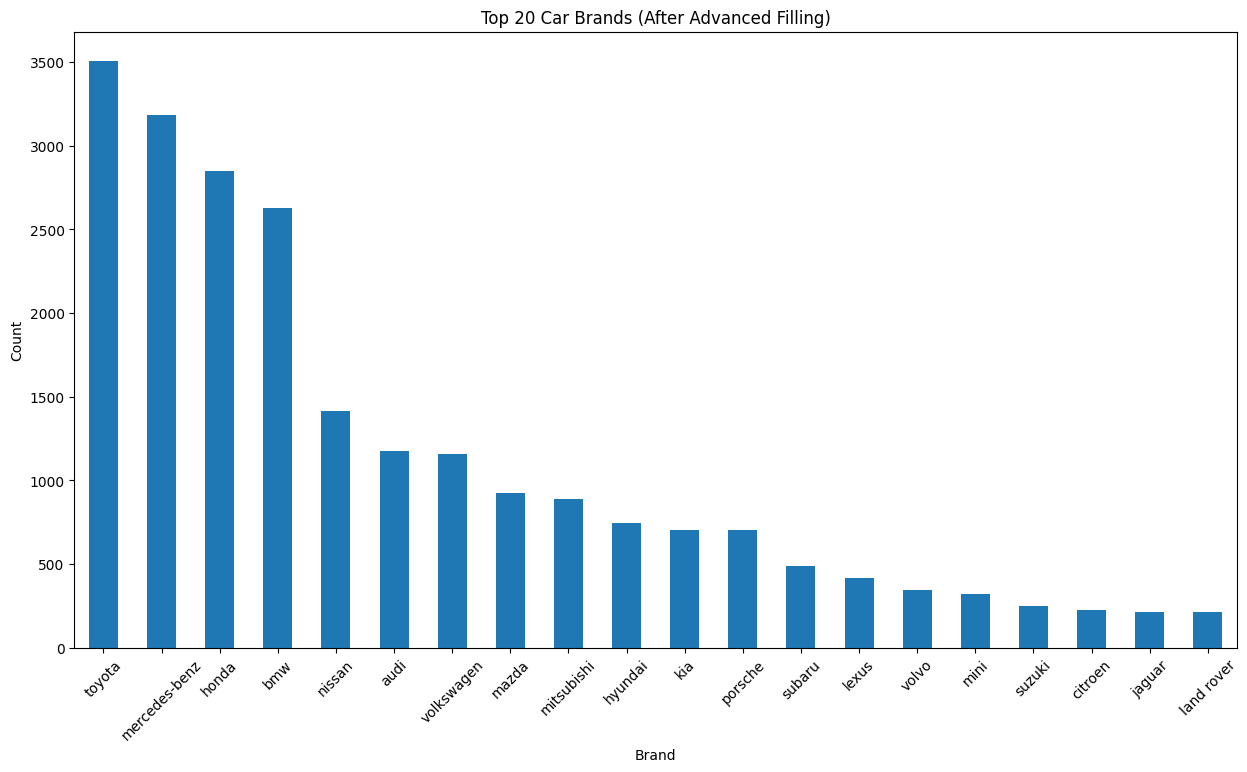

In [43]:
# process make
print("the make num:", data['make'].isnull().sum())

# gain the known makes
known_makes = data['make'].dropna().unique()

# fill the missing values
data.loc[data['make'].isnull(), 'make'] = data.loc[data['make'].isnull(), 'cleaned_title'].apply(
    lambda x: find_best_match(x.split()[0], known_makes)
)


print("the make num after cleaning:", data['make'].isnull().sum())

plt.figure(figsize=(15, 8))
data['make'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Car Brands (After Advanced Filling)')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### 2.1.3 process model

num of unkown model after clean: 0


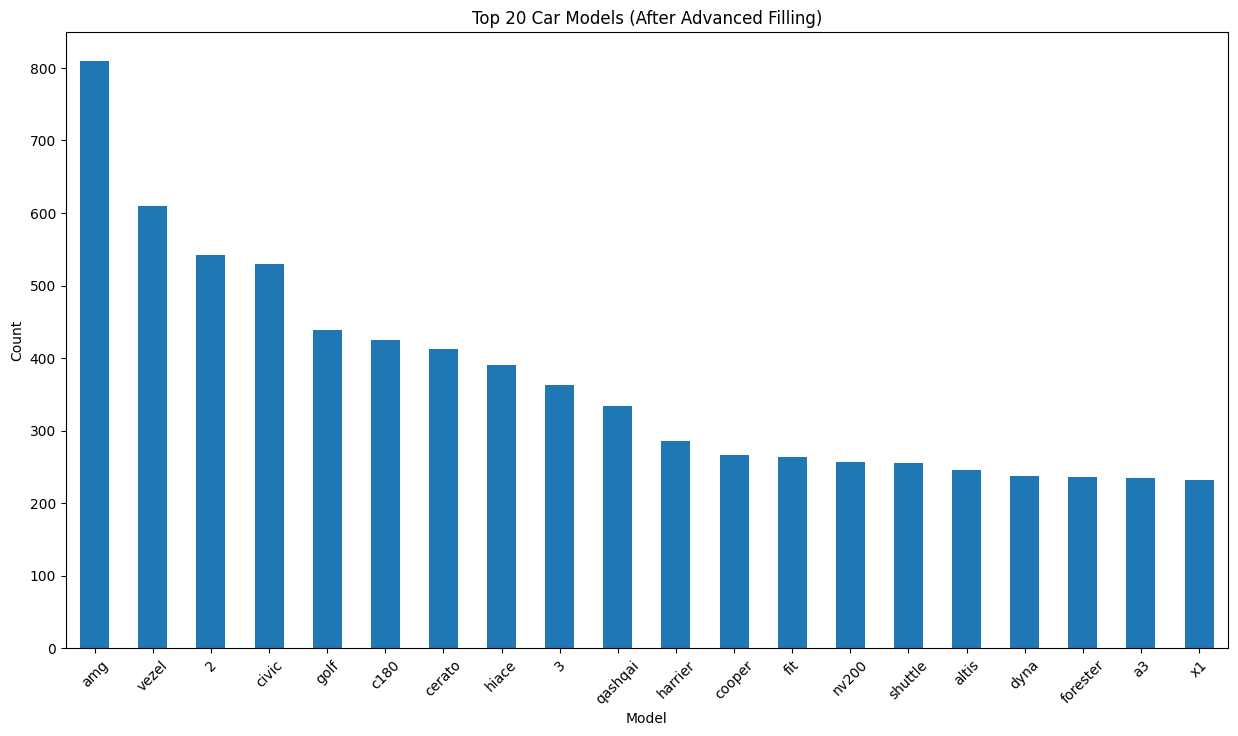

Final number of rows: 25000


In [44]:
# process model
# print("\nnum of lack model:", data['model'].isnull().sum())

# # gain the known models
# known_models = data['model'].dropna().unique()

# # fill the missing values
# data['model'] = data['model'].apply(lambda x: clean_title(str(x)) if pd.notnull(x) else x)

# # fill the missing values
# for make in data['make'].unique():
#     make_models = data[data['make'] == make]['model'].dropna().unique()
#     mask = (data['make'] == make) & (data['model'].isnull())
#     data.loc[mask, 'model'] = data.loc[mask, 'cleaned_title'].apply(
#         lambda x: find_best_match(' '.join(x.split()[1:]), make_models)
#     )

print("num of unkown model after clean:", data['model'].isnull().sum())

plt.figure(figsize=(15, 8))
data['model'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Car Models (After Advanced Filling)')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()




# drop the cleaned_title column
data = data.drop('cleaned_title', axis=1)
final_row_count = len(data)
print(f"Final number of rows: {final_row_count}")


#### 2.1.4 process discription

In [45]:
# drop discription
data = data.drop('description', axis=1)
data.head()

,make,model,manufactured,original_reg_date,reg_date,type_of_vehicle,category,transmission,curb_weight,power,...,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price
listing_id,,,,,,,,,,,,,,,,,,,,,
1292132,land rover,range,2018.0,NaN,08-mar-2018,suv,parf car,auto,1884.0,280.0,...,96000.0,88906.0,132031.0,NaN,NaN,uncategorized,3l supercharged v6 p380 engine at 375bhp/450nm...,"2 x massage/memory/cooling & warmer seat, rear...",NaN,193788.0
1294696,mercedes-benz,c200,2017.0,NaN,28-dec-2017,luxury sedan,"parf car, premium ad car",auto,1465.0,135.0,...,85680.0,40678.0,43950.0,NaN,NaN,uncategorized,"2.0l 4 cylinders inline turbocharged engine, p...","multi function steering, electric tailgate, re...",NaN,96800.0
1311717,honda,odyssey,2007.0,NaN,19-sep-2007,mpv,"coe car, premium ad car, low mileage car",auto,1648.0,118.0,...,138000.0,27994.0,30794.0,NaN,NaN,uncategorized,"2.4l k24a 4 cylinders inline dohc i-vtec, 5 sp...","cruise control, touchscreen audio, reverse cam...",NaN,39800.0
1310068,toyota,altis,2008.0,NaN,15-dec-2008,mid-sized sedan,"coe car, premium ad car",auto,1195.0,80.0,...,160000.0,16084.0,16084.0,NaN,NaN,uncategorized,super fuel efficient 1.6l 16 valves dohc vvt-i...,"leather seats, pioneer dvd audio system with r...",NaN,44800.0
1325280,lexus,gs,2006.0,NaN,22-dec-2006,luxury sedan,"coe car, premium ad car",auto,1660.0,183.0,...,183000.0,50414.0,55456.0,NaN,NaN,uncategorized,"powerful 3.0l v6 engine, 227bhp, 6 speed , key...",premium upholstery electric seats. memory seat...,NaN,25800.0


#### 2.1.5 process mnufactures

In [46]:
data['manufactured'] = data['manufactured'].astype('Int64')
missing_count = sum(data['manufactured'].isnull())
print(f"Before processing, missing manufactured value: {missing_count}")

Before processing, missing manufactured value: 7


In [47]:
data['manufactured'] = pd.to_numeric(data['manufactured'], errors='coerce')

# 打印初始缺失值数量
initial_missing = data['manufactured'].isnull().sum()
print(f"Initial missing manufactured values: {initial_missing}")

# 定义一个函数来找到最相似的类别
def find_similar_category(row, data):
    # 这里您需要定义相似性的标准。例如，我们可以使用 'type_of_vehicle'
    vehicle_type = row['type_of_vehicle']
    
    # 找到同类型车辆中价格最接近的
    similar = data[data['type_of_vehicle'] == vehicle_type].copy()
    return similar.iloc[0]['manufactured']

# 对于缺失的 'manufactured' 值，找到并填充相似类别的平均值
mask = data['manufactured'].isnull()
data.loc[mask, 'manufactured'] = data[mask].apply(lambda row: find_similar_category(row, data), axis=1)

# 如果还有缺失值，用该类型车辆的平均制造年份填充
mean_manufactured = data.groupby('type_of_vehicle')['manufactured'].transform('mean')
data['manufactured'].fillna(mean_manufactured, inplace=True)

# 如果仍然有缺失值（极少数情况），用整体平均值填充
data['manufactured'].fillna(data['manufactured'].mean(), inplace=True)

# 将 'manufactured' 转换为整数类型
data['manufactured'] = data['manufactured'].astype('Int64')

# 打印处理后的缺失值数量
final_missing = data['manufactured'].isnull().sum()
final_row_count = len(data)
print(f"Final number of rows: {final_row_count}")

Initial missing manufactured values: 7
Final number of rows: 25000


#### 2.1.6 process original_reg_date	

In [48]:
# drop the original_reg_date	
data = data.drop('original_reg_date', axis=1)
data.head()

,make,model,manufactured,reg_date,type_of_vehicle,category,transmission,curb_weight,power,fuel_type,...,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price
listing_id,,,,,,,,,,,,,,,,,,,,,
1292132,land rover,range,2018,08-mar-2018,suv,parf car,auto,1884.0,280.0,NaN,...,96000.0,88906.0,132031.0,NaN,NaN,uncategorized,3l supercharged v6 p380 engine at 375bhp/450nm...,"2 x massage/memory/cooling & warmer seat, rear...",NaN,193788.0
1294696,mercedes-benz,c200,2017,28-dec-2017,luxury sedan,"parf car, premium ad car",auto,1465.0,135.0,NaN,...,85680.0,40678.0,43950.0,NaN,NaN,uncategorized,"2.0l 4 cylinders inline turbocharged engine, p...","multi function steering, electric tailgate, re...",NaN,96800.0
1311717,honda,odyssey,2007,19-sep-2007,mpv,"coe car, premium ad car, low mileage car",auto,1648.0,118.0,NaN,...,138000.0,27994.0,30794.0,NaN,NaN,uncategorized,"2.4l k24a 4 cylinders inline dohc i-vtec, 5 sp...","cruise control, touchscreen audio, reverse cam...",NaN,39800.0
1310068,toyota,altis,2008,15-dec-2008,mid-sized sedan,"coe car, premium ad car",auto,1195.0,80.0,NaN,...,160000.0,16084.0,16084.0,NaN,NaN,uncategorized,super fuel efficient 1.6l 16 valves dohc vvt-i...,"leather seats, pioneer dvd audio system with r...",NaN,44800.0
1325280,lexus,gs,2006,22-dec-2006,luxury sedan,"coe car, premium ad car",auto,1660.0,183.0,NaN,...,183000.0,50414.0,55456.0,NaN,NaN,uncategorized,"powerful 3.0l v6 engine, 227bhp, 6 speed , key...",premium upholstery electric seats. memory seat...,NaN,25800.0


#### 2.1.6 process reg_date	and create vehicle age

In [49]:
# 5. process the reg_date
data['reg_date'] = pd.to_datetime(data['reg_date'])
# plt.figure(figsize=(12, 6))
# # sns.histplot(data['reg_date'].dt.year, kde=True, bins=30)
# plt.title('Distribution of Registration Year')
# plt.xlabel('Year')
# plt.ylabel('Count')
# plt.show()

# compute the vehicle age
current_date = pd.Timestamp.now()
data['vehicle_age'] = (current_date - data['reg_date']).astype('<m8[Y]')
data = data.drop('reg_date', axis=1)
# data = data.drop('manufactured', axis=1)
data.head()
final_row_count = len(data)
print(f"Final number of rows: {final_row_count}")


Final number of rows: 25000


### 2.1.7 Process 'type_of_vehicle' column

suv               5905
luxury_sedan      4585
sports_car        3257
midsized_sedan    3097
hatchback         2691
mpv               2588
van               1194
truck              964
stationwagon       469
bus_mini_bus       201
others              49
Name: type_of_vehicle, dtype: int64


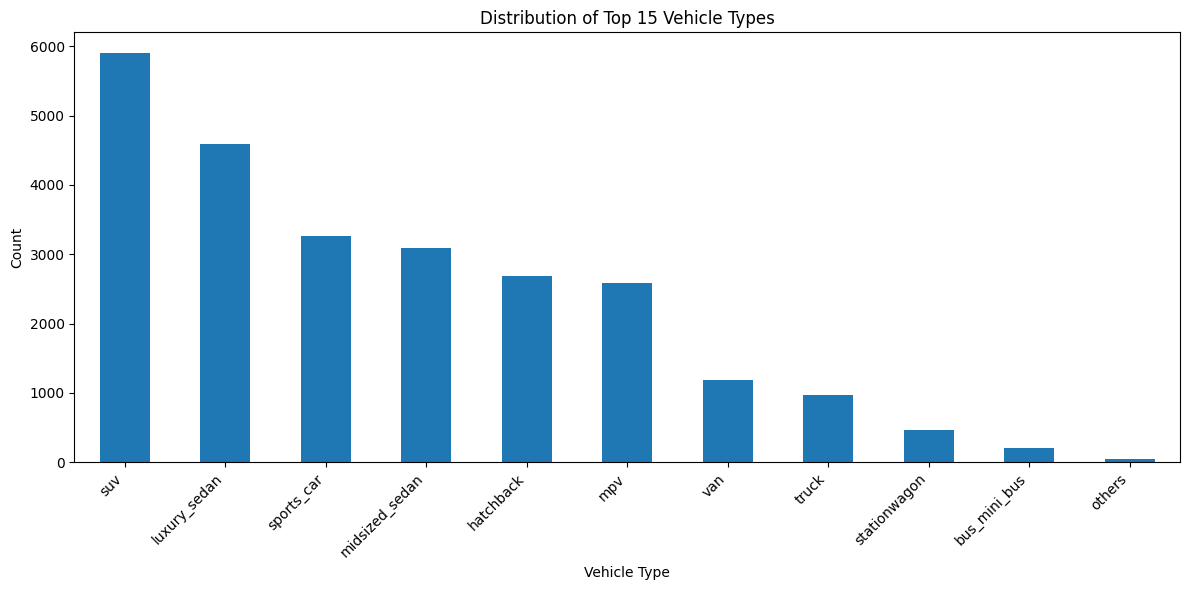

Final number of rows: 25000


In [50]:
def clean_string(s):
    # 转换为小写
    s = s.lower()
    # 将斜杠替换为空格
    s = s.replace('/', '_')
    # 移除反斜杠和其他特殊字符，但保留空格
    s = re.sub(r'[^\w\s]', '', s)
    # 删除多余的空格
    s = re.sub(r'\s+', '_', s)
    # 删除前后的空格
    return s.strip()

# 应用清理函数
data['type_of_vehicle'] = data['type_of_vehicle'].apply(clean_string)

# 分割复合类别
data['type_of_vehicle'] = data['type_of_vehicle'].str.split()
data = data.explode('type_of_vehicle')

# 显示清理后的数据分布
print(data['type_of_vehicle'].value_counts())

# 绘制柱状图
plt.figure(figsize=(12, 6))
top_15 = data['type_of_vehicle'].value_counts().nlargest(15)
top_15.plot(kind='bar')
plt.title('Distribution of Top 15 Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
final_row_count = len(data)
print(f"Final number of rows: {final_row_count}")

In [51]:
data_type_of_vehicle_encoded = pd.get_dummies(data['type_of_vehicle'], prefix='vehicle_type').astype(int)

# 获取 type_of_vehicle 列的索引位置
col_idx = data.columns.get_loc('type_of_vehicle')

# 删除原有的 type_of_vehicle 列
# data.drop('type_of_vehicle', axis=1, inplace=True)

# 将独热编码的列插入到原来 type_of_vehicle 列所在的位置
for i, col in enumerate(data_type_of_vehicle_encoded.columns):
    data.insert(col_idx + i, col, data_type_of_vehicle_encoded[col])
data.head()
final_row_count = len(data)
print(f"Final number of rows: {final_row_count}")


Final number of rows: 25000


#### 2.1.8: Process of 'category' column

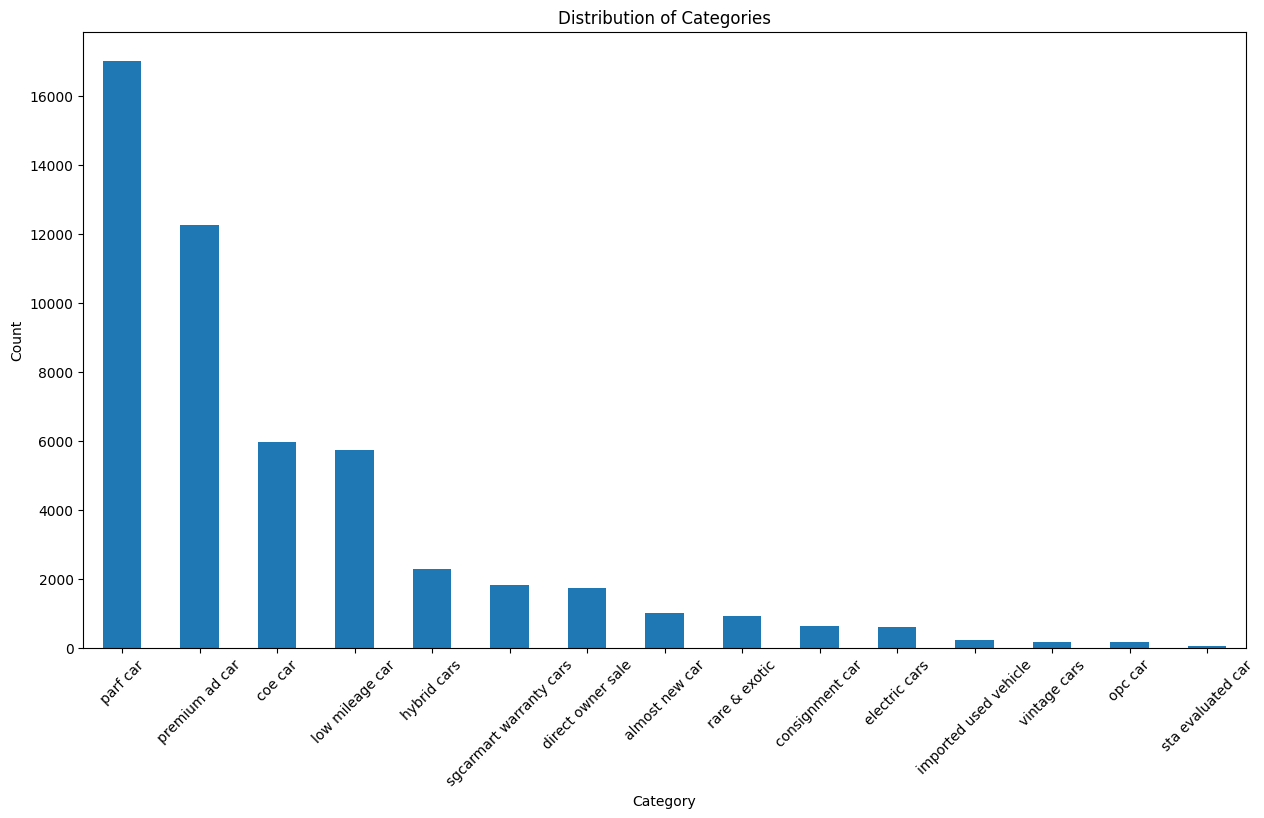

{'parf car', 'coe car', 'almost new car', 'sta evaluated car', 'opc car', 'vintage cars', 'electric cars', 'premium ad car', 'direct owner sale', 'low mileage car', 'sgcarmart warranty cars', 'hybrid cars', 'consignment car', 'rare & exotic', 'imported used vehicle'}
Final number of rows: 25000


In [52]:
# 替换掉 category 列中的 '-'，如果有的话
data['category'] = data['category'].replace('-', '')

# 将 category 列按逗号分割成列表
categories_split = data['category'].apply(lambda x: [item.strip() for item in x.split(',')] if isinstance(x, str) and x else [])

# output all the categories
categories = set([item for sublist in categories_split for item in sublist])

# 统计对应的类别数量，绘制柱状图
category_counts = pd.Series([item for sublist in categories_split for item in sublist]).value_counts()
plt.figure(figsize=(15, 8))
category_counts.plot(kind='bar')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
print(categories)
final_row_count = len(data)
print(f"Final number of rows: {final_row_count}")


In [53]:
# 使用 MultiLabelBinarizer 对类别进行 One-Hot 编码
mlb = MultiLabelBinarizer()
category_encoded = mlb.fit_transform(categories_split)

# 将 One-Hot 编码后的列创建为新的 DataFrame
category_df = pd.DataFrame(category_encoded, columns=[str(c) for c in mlb.classes_])

# 确保 category_df 的索引与 data 一致
category_df = category_df.reset_index(drop=True)
data = data.reset_index(drop=True)

# 获取 category 列的索引位置
col_idx = data.columns.get_loc('category')

# 删除原有的 category 列
data.drop('category', axis=1, inplace=True)

# 将独热编码的列插入到原来 category 列所在的位置
for i, col in enumerate(category_df.columns):
    data.insert(col_idx + i, col, category_df[col])

# 用0填充NaN值，避免转换时出现 NaN 错误
data[mlb.classes_] = data[mlb.classes_].fillna(0)

# 确保所有类型都为整数
data[mlb.classes_] = data[mlb.classes_].astype(int)

# 查看新的 DataFrame
data.head()
final_row_count = len(data)
print(f"Final number of rows: {final_row_count}")

Final number of rows: 25000


#### 2.1.9: Process of 'transmission' column

In [54]:
data['transmission'].value_counts()

auto      23301
manual     1699
Name: transmission, dtype: int64

In [55]:
data_transmission_encoded = pd.get_dummies(data['transmission'], prefix='transmission_type').astype(int)

# 获取transmission列的索引位置
col_index = data.columns.get_loc('transmission')

# 删除原有的transmission列
data.drop('transmission',axis=1,inplace=True)

# 将独热编码的列插入到原来的transmission列所在的位置
for i, col in enumerate(data_transmission_encoded.columns):
    data.insert(col_idx + i, col, data_transmission_encoded[col])

In [56]:
data.head()

,make,model,manufactured,vehicle_type_bus_mini_bus,vehicle_type_hatchback,vehicle_type_luxury_sedan,vehicle_type_midsized_sedan,vehicle_type_mpv,vehicle_type_others,vehicle_type_sports_car,...,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price,vehicle_age
0,land rover,range,2018,0,0,0,0,0,0,0,...,88906.0,132031.0,NaN,NaN,uncategorized,3l supercharged v6 p380 engine at 375bhp/450nm...,"2 x massage/memory/cooling & warmer seat, rear...",NaN,193788.0,6.0
1,mercedes-benz,c200,2017,0,0,1,0,0,0,0,...,40678.0,43950.0,NaN,NaN,uncategorized,"2.0l 4 cylinders inline turbocharged engine, p...","multi function steering, electric tailgate, re...",NaN,96800.0,6.0
2,honda,odyssey,2007,0,0,0,0,1,0,0,...,27994.0,30794.0,NaN,NaN,uncategorized,"2.4l k24a 4 cylinders inline dohc i-vtec, 5 sp...","cruise control, touchscreen audio, reverse cam...",NaN,39800.0,17.0
3,toyota,altis,2008,0,0,0,1,0,0,0,...,16084.0,16084.0,NaN,NaN,uncategorized,super fuel efficient 1.6l 16 valves dohc vvt-i...,"leather seats, pioneer dvd audio system with r...",NaN,44800.0,15.0
4,lexus,gs,2006,0,0,1,0,0,0,0,...,50414.0,55456.0,NaN,NaN,uncategorized,"powerful 3.0l v6 engine, 227bhp, 6 speed , key...",premium upholstery electric seats. memory seat...,NaN,25800.0,17.0


**please write code after**

#### 2.1.10: Process of 'curb_weight' column

In [57]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from scipy import stats

def impute_missing_values(data, target_column, estimation_features, n_neighbors=5, z_threshold=3):
    """
    使用KNN方法对目标列进行缺失值填充，并在必要时使用中位数填充。
    增加了异常值检测和处理，以及错误处理。

    参数:
    data (pd.DataFrame): 包含目标列和估算特征的数据框
    target_column (str): 需要填充缺失值的目标列名
    estimation_features (list): 用于估算的特征列表
    n_neighbors (int): KNN算法中的邻居数量，默认为5
    z_threshold (float): 用于检测异常值的Z分数阈值，默认为3

    返回:
    pd.DataFrame: 处理后的数据框
    dict: 包含处理结果统计信息的字典
    """
    try:
        # 复制数据框以避免修改原始数据
        data = data.copy()
        
        # 记录初始缺失值数量
        initial_missing = data[target_column].isnull().sum()
        print(f"Initial missing {target_column} values: {initial_missing}")

        # 为KNN估算器准备数据
        impute_data = data[estimation_features + [target_column]].copy()

        # 对分类变量进行独热编码
        categorical_features = impute_data.select_dtypes(include=['object', 'category']).columns
        if not categorical_features.empty:
            encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
            encoded_features = encoder.fit_transform(impute_data[categorical_features])
            
            # 使用兼容新旧版本的方法获取特征名
            try:
                encoded_feature_names = encoder.get_feature_names_out(categorical_features)
            except AttributeError:
                # 如果是旧版本的scikit-learn，使用旧方法
                encoded_feature_names = encoder.get_feature_names(categorical_features)
            
            encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=impute_data.index)
            impute_data = pd.concat([impute_data.drop(columns=categorical_features), encoded_df], axis=1)

        # 检查是否有足够的非缺失值来进行KNN估算
        non_missing_count = impute_data[target_column].notna().sum()
        if non_missing_count > n_neighbors:
            # 初始化KNN估算器并执行估算
            imputer = KNNImputer(n_neighbors=n_neighbors, weights='distance')
            imputed_values = imputer.fit_transform(impute_data)
            
            # 将估算的值放回原始数据框
            data.loc[data[target_column].isnull(), target_column] = imputed_values[data[target_column].isnull(), -1]
        else:
            print(f"Not enough non-missing values for KNN imputation. Skipping KNN step.")

        # 如果仍有缺失值，用分组中位数填充
        if data[target_column].isnull().sum() > 0:
            for feature in estimation_features:
                if data[feature].dtype in ['object', 'category']:
                    median_values = data.groupby(feature)[target_column].transform('median')
                    data[target_column].fillna(median_values, inplace=True)

        # 如果还有缺失值，用整体中位数填充
        data[target_column].fillna(data[target_column].median(), inplace=True)

        # 异常值检测和处理
        z_scores = np.abs(stats.zscore(data[target_column]))
        outliers = z_scores > z_threshold
        print(f"Detected {outliers.sum()} outliers in {target_column}")

        if outliers.sum() > 0:
            # 使用中位数替换异常值
            median_value = data[target_column].median()
            data.loc[outliers, target_column] = median_value
            print(f"Replaced outliers with median value: {median_value}")

        # 计算并打印处理后的统计信息
        final_missing = data[target_column].isnull().sum()
        filled_values = initial_missing - final_missing
        print(f"After processing, missing {target_column} values: {final_missing}")
        print(f"Filled missing values: {filled_values}")

        print(f"\n{target_column} statistics:")
        print(data[target_column].describe())

        # 返回处理后的数据框和统计信息
        stats = {
            'initial_missing': initial_missing,
            'final_missing': final_missing,
            'filled_values': filled_values,
            'outliers_detected': outliers.sum(),
            'outliers_replaced': outliers.sum()
        }
        
        return data, stats
    
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        # 返回原始数据和错误信息
        return data, {'error': str(e)}

data, stats = impute_missing_values(data, 'curb_weight', ['type_of_vehicle', 'manufactured'])
print(f"Final number of rows: {len(data)}")

Initial missing curb_weight values: 307


e:\develop\Python\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


An error occurred: local variable 'stats' referenced before assignment
Final number of rows: 25000


#### 2.1.11: Process of 'power' column

In [58]:
# Fill null rows using mean values, group by type_of_vehicle
# data['power'] = data.groupby('type_of_vehicle')['power'].transform(lambda x: x.fillna(x.mean()))
data, stats = impute_missing_values(data, 'power', ['type_of_vehicle'])


Initial missing power values: 2640


e:\develop\Python\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


An error occurred: local variable 'stats' referenced before assignment


#### 2.1.12: Process of 'fuel_type' column

In [59]:
data = data.drop(columns=["fuel_type"])

#### 2.1.13: Process of 'engine_cap' column

In [60]:
# Fill null rows using mean values, group by type_of_vehicle
# data['engine_cap'] = data.groupby('type_of_vehicle')['engine_cap'].transform(lambda x: x.fillna(int(x.mean())))
data, stats = impute_missing_values(data, 'engine_cap', ['type_of_vehicle'])


Initial missing engine_cap values: 596


e:\develop\Python\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


An error occurred: local variable 'stats' referenced before assignment


#### 2.1.14: Process of 'no_of_owners' column

In [61]:
data, stats = impute_missing_values(data, 'no_of_owners', ['type_of_vehicle'])
print(f"Final number of rows: {len(data)}")

# data = data.dropna(subset=["no_of_owners"])

Initial missing no_of_owners values: 18
An error occurred: local variable 'stats' referenced before assignment
Final number of rows: 25000


e:\develop\Python\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### 2.1.15: Process of 'depreciation' column

In [62]:
# data = data.dropna(subset=["depreciation"])
data, stats = impute_missing_values(data, 'depreciation', ['type_of_vehicle'])
print(f"Final number of rows: {len(data)}")

Initial missing depreciation values: 507


e:\develop\Python\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


An error occurred: local variable 'stats' referenced before assignment
Final number of rows: 25000


#### 2.1.16: Process of 'coe' column
No processing needed

#### 2.1.17: Process of 'road_tax' column

In [63]:
# Fill null rows using mean values
data['road_tax'] = data['road_tax'].fillna(int(data['road_tax'].mean()))

#### 2.1.18: Process of 'dereg_value' column

In [64]:
# data = data.dropna(subset=["dereg_value"])
data, stats = impute_missing_values(data, 'dereg_value', ['type_of_vehicle'])
print(f"Final number of rows: {len(data)}")

Initial missing dereg_value values: 220


e:\develop\Python\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


An error occurred: local variable 'stats' referenced before assignment
Final number of rows: 25000


#### 2.1.19: Process of 'mileage' column

In [65]:
data = data.drop(columns=["mileage"])

#### 2.1.20: Process of 'omv' column

In [66]:
# data = data.dropna(subset=["omv"])
data, stats = impute_missing_values(data, 'omv', ['type_of_vehicle'])
print(f"Final number of rows: {len(data)}")

Initial missing omv values: 64
An error occurred: local variable 'stats' referenced before assignment
Final number of rows: 25000


e:\develop\Python\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### 2.1.21: Process of 'arf' column

In [67]:
# data = data.dropna(subset=["arf"])
data, stats = impute_missing_values(data, 'arf', ['type_of_vehicle'])
print(f"Final number of rows: {len(data)}")

Initial missing arf values: 174


e:\develop\Python\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


An error occurred: local variable 'stats' referenced before assignment
Final number of rows: 25000


#### 2.1.22: Process of 'opc_scheme' column

In [68]:
data = data.drop(columns=["opc_scheme"])

#### 2.1.23: Process of 'lifespan' column

In [69]:
data = data.drop(columns=["lifespan"])

#### 2.1.24: Process of 'eco_category' column

In [70]:
data = data.drop(columns=["eco_category"])

#### 2.1.25: Process of 'features' column

In [71]:
data = data.drop(columns=["features"])

#### 2.1.26: Process of 'accessories' column

In [72]:
data = data.drop(columns=["accessories"])

#### 2.1.27: Process of 'indicative_price' column

In [73]:
data = data.drop(columns=["indicative_price"])
# 删除原有的 type_of_vehicle 列
data.drop('type_of_vehicle', axis=1, inplace=True)

save the train_cleaned.csv

In [74]:
current_dir = os.getcwd()
save_filename = 'train_cleaned.csv'
save_filepath = os.path.join(current_dir, save_filename)
data.to_csv(save_filepath)